# ML Classification Titanic Project

                                     Project: Predict Titanic Survival

Goal of this project.

The goal of this project is to predict either person survived or not. We would use such charachetristics to analyze: gender, age, ticket class etc.

In the train doc we have full information and in the test we are missing survive or not, as this would be our task to predict it.

- 1. part: analyse + compare data
- 2. part: Supervised ML Logistic Regression & Decision Trees & Random Forest & Support Vector Machine. 


The RMS Titanic set sail on its maiden voyage in 1912, crossing the Atlantic from Southampton, England to New York City. The ship never completed the voyage, sinking to the bottom of the Atlantic Ocean after hitting an iceberg, bringing down 1,502 of 2,224 passengers onboard. In this project you will create a Logistic Regression model that predicts which passengers survived the sinking of the Titanic, based on features like age and class. 

<img src="titanic.jpeg">

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

# Load the Titanic dataset from seaborn library 
titanic = sns.load_dataset('titanic')
print(titanic.describe())

# Data Cleaning

In [242]:
# drop NaN
titanic = titanic.dropna(axis=0, how='any')
titanic.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
6,0,1,male,54.0,0,0,51.8625,S,First,man,True,E,Southampton,no,True
10,1,3,female,4.0,1,1,16.7000,S,Third,child,False,G,Southampton,yes,False
11,1,1,female,58.0,0,0,26.5500,S,First,woman,False,C,Southampton,yes,True


In [243]:
# check if Nan still left 
titanic.deck.isnull()

1      False
3      False
6      False
10     False
11     False
       ...  
871    False
872    False
879    False
887    False
889    False
Name: deck, Length: 182, dtype: bool

In [244]:
# remove for duplicated headers for all columns 
titanic = titanic.loc[ titanic.ne(titanic.columns).any(axis=1)]

titanic.columns

Index(['survived', 'pclass', 'sex', 'age', 'sibsp', 'parch', 'fare',
       'embarked', 'class', 'who', 'adult_male', 'deck', 'embark_town',
       'alive', 'alone'],
      dtype='object')

In [245]:
# check before dropping duplicates
titanic[titanic.duplicated()]

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
641,1,1,female,24.0,0,0,69.3,C,First,woman,False,B,Cherbourg,yes,True


In [246]:
# drop duplicates
titanic.drop_duplicates(keep='first', inplace=True)

In [247]:
# check after dropping duplicates
titanic[titanic.duplicated()]

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone


In [248]:
# check datatypes
titanic.dtypes

survived          int64
pclass            int64
sex              object
age             float64
sibsp             int64
parch             int64
fare            float64
embarked         object
class          category
who              object
adult_male         bool
deck           category
embark_town      object
alive            object
alone              bool
dtype: object

In [249]:
titanic.head(10)

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
6,0,1,male,54.0,0,0,51.8625,S,First,man,True,E,Southampton,no,True
10,1,3,female,4.0,1,1,16.7000,S,Third,child,False,G,Southampton,yes,False
11,1,1,female,58.0,0,0,26.5500,S,First,woman,False,C,Southampton,yes,True
21,1,2,male,34.0,0,0,13.0000,S,Second,man,True,D,Southampton,yes,True
23,1,1,male,28.0,0,0,35.5000,S,First,man,True,A,Southampton,yes,True
27,0,1,male,19.0,3,2,263.0000,S,First,man,True,C,Southampton,no,False
52,1,1,female,49.0,1,0,76.7292,C,First,woman,False,D,Cherbourg,yes,False
54,0,1,male,65.0,0,1,61.9792,C,First,man,True,B,Cherbourg,no,False


In [250]:
titanic['sex'] = titanic['sex'].map({'male': 0, 'female': 1})  # Male = 0; Female = 1 
titanic['sex']

1      1
3      1
6      0
10     1
11     1
      ..
871    1
872    0
879    1
887    1
889    0
Name: sex, Length: 181, dtype: int64

# Define the features (X) and Label (y)

In [251]:

# Define features and label for the models 
X = titanic[['sex', 'pclass']]
y = titanic['survived']

In [252]:
X

,sex,pclass
1,1,1
3,1,1
6,0,1
10,1,3
11,1,1
...,...,...
871,1,1
872,0,1
879,1,1
887,1,1


In [253]:
y  # 1 - Survived, 0 - didn't survive 

1      1
3      1
6      0
10     1
11     1
      ..
871    1
872    0
879    1
887    1
889    1
Name: survived, Length: 181, dtype: int64

# Split the data into train and test 

In [254]:
# Splitting the data into training and testing sets (not needed for k-fold cross-validation)
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2)

# Creating a list of models with their names and testing their mean accuracy 

In [255]:
# Creating a list of models with their names 
models = [('Logistic Regression', LogisticRegression()), 
          ('Decision Tree', DecisionTreeClassifier()), 
          ('Random Forest', RandomForestClassifier()),
          ('SVM', SVC())]

# Iterate through each model to perform k-fold cross-validation and collect metrics  
for name,model in models:
    # Perform k-fold cross-validation (here 5 folds are used)
    cv_results_accuracy = cross_val_score(model,X,y,cv=5)  # Collect accuracy scores
    
    # Print mean accuracy score of the model from k-fold cross validation   
    print(f'{name} Mean Accuracy: {cv_results_accuracy.mean()}')

Logistic Regression Mean Accuracy: 0.7400900900900901
Decision Tree Mean Accuracy: 0.7235735735735735
Random Forest Mean Accuracy: 0.7234234234234235
SVM Mean Accuracy: 0.728978978978979


# Logistic Regression 

accuracy:  0.7837837837837838
y_predicted:  [1 0 1 0 0 1 1 1 1 1 0 0 0 0 1 0 1 0 1 1 1 0 1 0 0 1 0 1 0 1 1 1 1 0 0 0 1]
y_test:  1      1
224    1
539    1
434    0
872    0
581    1
11     1
215    1
627    1
412    1
671    0
512    1
75     0
292    0
205    0
340    1
781    1
583    0
318    1
523    1
473    1
599    1
558    1
645    1
806    0
327    1
748    0
307    1
460    1
257    1
329    1
52     1
269    1
370    1
492    0
174    0
268    1
Name: survived, dtype: int64
Classification Matrix:
metric:                precision    recall  f1-score   support

           0       0.59      0.91      0.71        11
           1       0.95      0.73      0.83        26

    accuracy                           0.78        37
   macro avg       0.77      0.82      0.77        37
weighted avg       0.84      0.78      0.79        37



Text(50.722222222222214, 0.5, 'y_predicted')

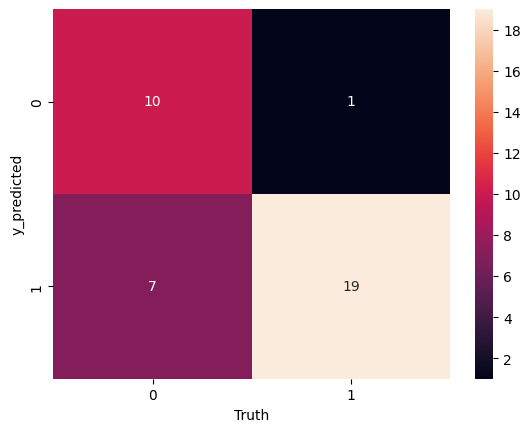

In [256]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix, ConfusionMatrixDisplay

model1 = LogisticRegression()
model1.fit(X_train, y_train)
print('accuracy: ', model1.score(X_test, y_test)) 

y_predicted = model1.predict(X_test)
print('y_predicted: ', y_predicted)

print('y_test: ', y_test)

from sklearn import metrics
cm = metrics.confusion_matrix(y_test, y_predicted)
metric = metrics.classification_report(y_test, y_predicted)
print('Classification Matrix:')
print('metric: ', metric)

sns.heatmap(cm, annot=True)
plt.xlabel('Truth')
plt.ylabel('y_predicted')


# Decision Tree

In [257]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,train_size= 0.8, random_state= 10, shuffle= True)
from sklearn import tree
from sklearn.preprocessing import LabelEncoder
model2 = tree.DecisionTreeClassifier()
model2.fit(X_train, y_train)
print('accuracy: ', model2.score(X_test, y_test)) 

y_predicted = model2.predict(X_test)
print('y_predicted: ', y_predicted)

print('y_test: ', y_test)

accuracy:  0.8108108108108109
y_predicted:  [0 1 1 1 1 1 0 0 0 1 0 1 1 1 1 0 1 1 0 0 1 1 1 0 1 1 0 0 1 1 0 1 0 1 0 1 0]
y_test:  712    1
689    1
340    1
887    1
356    1
862    1
515    0
62     0
741    0
556    1
263    0
123    1
292    0
319    1
337    1
550    1
498    0
393    1
118    0
701    1
618    1
3      1
230    1
867    0
581    1
341    1
434    0
782    0
571    1
310    1
305    1
307    1
645    1
311    1
544    0
835    1
27     0
Name: survived, dtype: int64


In [258]:
model2.predict( [[1, 1]] )

c:\Python\Python3113\Lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


array([1], dtype=int64)

In [259]:
model2.predict( [[1, 2]] )

c:\Python\Python3113\Lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


array([1], dtype=int64)

In [260]:
model2.predict( [[1, 3]] )

c:\Python\Python3113\Lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


array([1], dtype=int64)

In [261]:
model2.predict( [[0, 1]] )

c:\Python\Python3113\Lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


array([0], dtype=int64)

In [262]:
model2.predict( [[0, 2]] )

c:\Python\Python3113\Lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


array([1], dtype=int64)

In [263]:
model2.predict( [[0, 3]] )

c:\Python\Python3113\Lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


array([0], dtype=int64)

### we've tested, that woman [1] from the first class [1], second class [2] and the thisrd class[3] has survived [1];
### man [0] from the first class [1] didn't survive, from the second class[2] has survived and from the third class[3] didn't survive 

Classification Matrix:
metric:                precision    recall  f1-score   support

           0       0.67      0.83      0.74        12
           1       0.91      0.80      0.85        25

    accuracy                           0.81        37
   macro avg       0.79      0.82      0.80        37
weighted avg       0.83      0.81      0.82        37



Text(50.722222222222214, 0.5, 'y_predicted')

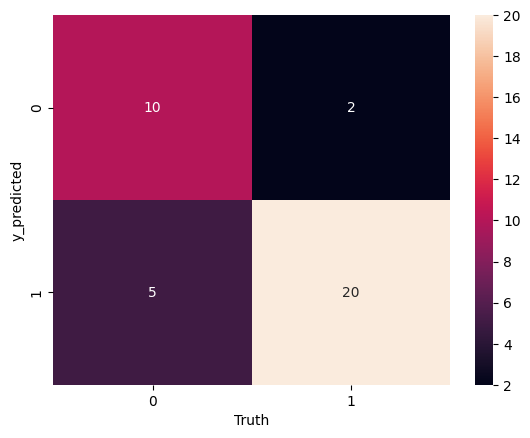

In [264]:
from sklearn import metrics
cm = metrics.confusion_matrix(y_test, y_predicted)
metric = metrics.classification_report(y_test, y_predicted)
print('Classification Matrix:')
print('metric: ', metric)


sns.heatmap(cm, annot=True)

plt.xlabel('Truth')
plt.ylabel('y_predicted')

# Random Forest

In [265]:
from sklearn.ensemble import RandomForestClassifier
# create the Model
model3 = RandomForestClassifier(n_estimators = 10, random_state=1)

# train the Model
model3.fit(X_train, y_train)

# make prediciton
y_predicted = model3.predict(X_test)

# evaluate Model
model3.score(X_test, y_test) # accuracy

0.8108108108108109

Classification Matrix:
metric:                precision    recall  f1-score   support

           0       0.67      0.83      0.74        12
           1       0.91      0.80      0.85        25

    accuracy                           0.81        37
   macro avg       0.79      0.82      0.80        37
weighted avg       0.83      0.81      0.82        37



Text(50.722222222222214, 0.5, 'y_predicted')

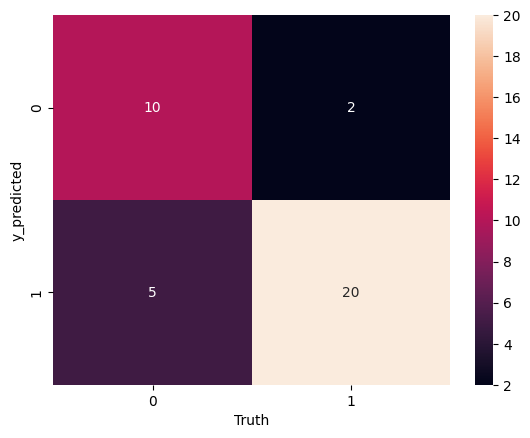

In [266]:
from sklearn import metrics
cm = metrics.confusion_matrix(y_test, y_predicted)
metric = metrics.classification_report(y_test, y_predicted)
print('Classification Matrix:')
print('metric: ', metric)

sns.heatmap(cm, annot=True)
plt.xlabel('Truth')
plt.ylabel('y_predicted')

# SVM 

In [267]:
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size= 0.2, random_state= 1)

# Create Model
model4 = SVC(kernel='poly')

# train the Model
model4.fit(X_train, y_train)

# make prediciton
y_predicted = model4.predict(X_test)

# evaluate Model
model4.score(X_test, y_test) # accuracy

0.6486486486486487

Classification Matrix:
metric:                precision    recall  f1-score   support

           0       0.47      0.58      0.52        12
           1       0.77      0.68      0.72        25

    accuracy                           0.65        37
   macro avg       0.62      0.63      0.62        37
weighted avg       0.67      0.65      0.66        37



Text(50.722222222222214, 0.5, 'y_predicted')

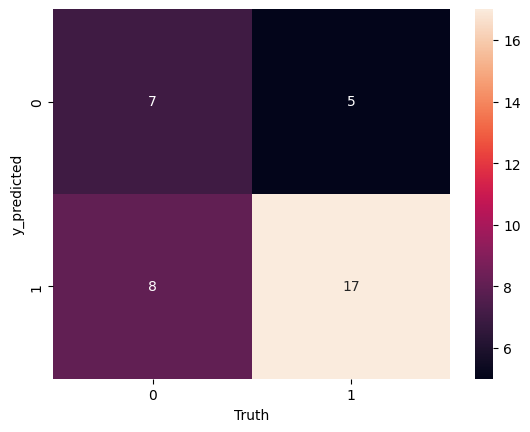

In [268]:
from sklearn import metrics
cm = metrics.confusion_matrix(y_test, y_predicted)
metric = metrics.classification_report(y_test, y_predicted)
print('Classification Matrix:')
print('metric: ', metric)

sns.heatmap(cm, annot=True)
plt.xlabel('Truth')
plt.ylabel('y_predicted')

# Predictions if women have survived or not 

In [270]:
# logistic regression prediction if woman survived or not: 
print('logistic regression prediction if woman survived or not: ')

print(model1.predict( [[1, 1]] ))
print(model1.predict( [[1, 2]] ))
print(model1.predict( [[1, 3]] ))

# decision tree model prediction woman survived or not: 
print('decision tree model prediction if woman survived or not: ')
print(model2.predict( [[1, 1]] ))
print(model2.predict( [[1, 2]] ))
print(model2.predict( [[1, 3]] ))

# random forest model prediction woman survived or not: 
print('random forest model prediction if woman survived or not: ')
print(model3.predict( [[1, 1]] ))
print(model3.predict( [[1, 2]] ))
print(model3.predict( [[1, 3]] ))


# support vectore machine model prediction woman survived or not: 
print('support vectore machine model prediction if woman survived or not: ')
print(model4.predict( [[1, 1]] ))
print(model4.predict( [[1, 2]] ))
print(model4.predict( [[1, 3]] ))




logistic regression prediction if woman survived or not: 
[1]
[1]
[1]
decision tree model prediction if woman survived or not: 
[1]
[1]
[1]
random forest model prediction if woman survived or not: 
[1]
[1]
[1]
support vectore machine model prediction if woman survived or not: 
[1]
[1]
[1]


c:\Python\Python3113\Lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
c:\Python\Python3113\Lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
c:\Python\Python3113\Lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
c:\Python\Python3113\Lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
c:\Python\Python3113\Lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
c:\Python\Python3113\Lib\site-packages\sklearn\base.py:465: UserWarning: X does not have val

### all our models have predicted that women from the first, second and third class have survived

# Predictions if men have survived or not

In [271]:
# logistic regression prediction if men survived or not: 
print('logistic regression prediction if men survived or not: ')

print(model1.predict( [[0, 1]] ))
print(model1.predict( [[0, 2]] ))
print(model1.predict( [[0, 3]] ))

# decision tree model prediction man survived or not: 
print('decision tree model regression prediction if man survived or not: ')
print(model2.predict( [[0, 1]] ))
print(model2.predict( [[0, 2]] ))
print(model2.predict( [[0, 3]] ))

# random forest model prediction man survived or not: 
print('random forest model prediction if man survived or not: ')
print(model3.predict( [[0, 1]] ))
print(model3.predict( [[0, 2]] ))
print(model3.predict( [[0, 3]] ))


# support vectore machine model prediction man survived or not: 
print('support vectore machine model prediction if man survived or not: ')
print(model4.predict( [[0, 1]] ))
print(model4.predict( [[0, 2]] ))
print(model4.predict( [[0, 3]] ))

logistic regression prediction if men survived or not: 
[0]
[0]
[0]
decision tree model regression prediction if man survived or not: 
[0]
[1]
[0]
random forest model prediction if man survived or not: 
[0]
[1]
[0]
support vectore machine model prediction if man survived or not: 
[0]
[0]
[0]


c:\Python\Python3113\Lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
c:\Python\Python3113\Lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
c:\Python\Python3113\Lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
c:\Python\Python3113\Lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
c:\Python\Python3113\Lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
c:\Python\Python3113\Lib\site-packages\sklearn\base.py:465: UserWarning: X does not have val

### logistic regression and support vector machine models have predicted that men from all classes  didn't survive, 
### but decision tree and random forest models have predcited, that men from the second  class have survived. 
